[**Zillow Economics Data**](#https://www.kaggle.com/zillow/zecon)
***
<br><font color=blue>Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow. </font>
***
In this kernel [plotly](#https://plot.ly) library is used to visualize time series data. The *range selector* in plolty package is fantastic, it will alow to zoom data based on month,year ect. The [Sqaurify](#https://github.com/laserson/squarify) library is used to visualize state vise real estate price. The missingno is nice package for visualize missing value in data set
***
<center><img src="https://static.pexels.com/photos/259600/pexels-photo-259600.jpeg"></center>


**Steps**
1. [Load pacakages](#Load-packages)
2. [Read data](#Read-data)
3. [Data-Explore](#Data-Explore)
4. [Missing-value](#Missing-value)
5. [Detailed-Data-anaylsis](#Data-analysis)
6. [Resample](#Resample)
7. [Days-On-Zillow-AllHomes](#Days-On-Zillow-AllHomes)

## Load packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import gc
from plotnine import *

%matplotlib inline
plt.style.use('fivethirtyeight')


/home/sudhir/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



## Read data 

In [69]:
path ='file/'
#path = '../input/'
state_ts = pd.read_csv(path+'State_time_series.csv',parse_dates=['Date'])
#Dictionary = pd.read_csv(path+'DataDictionary.csv')
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13026, 86)


## Data Explore

In [70]:
state_ts.head()

Date  RegionName  DaysOnZillow_AllHomes  \
0 1996-04-30     Alabama                    NaN   
1 1996-04-30     Arizona                    NaN   
2 1996-04-30    Arkansas                    NaN   
3 1996-04-30  California                    NaN   
4 1996-04-30    Colorado                    NaN   

   HomesSoldAsForeclosuresRatio_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

                ...                 ZHVI_BottomTier  ZHVI_CondoCoop  \
0               ...                             NaN         99500.0   
1               ...                         67100.0         78900.0   
2               ...                         38400.0         70300.0   
3               ...                         95100.0        136100.0   
4               ...                         82700.0         99400.0   

   ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
0          79500.0                     79000.0      140200.0           NaN   
1         103600.0                    107500.0      168700.0           NaN   
2          64400.0                     64500.0      115200.0           NaN   
3         157900.0                    162000.0      270600.0           NaN   
4         128100.0                    133600.0      209300.0           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
0                             NaN                              NaN  
1                             NaN                              NaN  
2                             NaN                              NaN  
3                             NaN                              NaN  
4                             NaN                              NaN  

[5 rows x 86 columns]

In [4]:
state_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 86 columns):
Date                                                             13026 non-null datetime64[ns]
RegionName                                                       13026 non-null object
DaysOnZillow_AllHomes                                            4458 non-null float64
HomesSoldAsForeclosuresRatio_AllHomes                            6701 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4692 non-null float64
InventoryRaw_AllHomes                                            4692 non-null float64
MedianListingPricePerSqft_1Bedroom                               3397 non-null float64
MedianListingPricePerSqft_2Bedroom                               4379 non-null float64
MedianListingPricePerSqft_3Bedroom                               4408 non-null float64
MedianListingPricePerSqft_4Bedroom                               4478 non-null float64
MedianListing

In [71]:
state_ts.describe()

DaysOnZillow_AllHomes  HomesSoldAsForeclosuresRatio_AllHomes  \
count            4458.000000                            6701.000000   
mean              112.027740                               3.211209   
std                31.879683                               5.136004   
min                43.000000                               0.004200   
25%                91.406250                               0.572500   
50%               110.625000                               1.599600   
75%               129.250000                               3.679900   
max               796.500000                              52.296500   

       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
count                           4692.000000            4692.000000   
mean                           34228.572677           34206.862958   
std                            35573.522409           35663.442612   
min                              971.000000             919.000000   
25%                            10048.250000            9985.750000   
50%                            22504.500000           21869.000000   
75%                            48926.500000           48504.500000   
max                           261729.000000          269380.000000   

       MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
count                         3397.000000                         4379.000000   
mean                           181.167799                          133.085113   
std                             98.778811                           72.439852   
min                             58.333333                           61.354167   
25%                            126.824265                           90.946610   
50%                            160.378101                          118.962585   
75%                            202.600580                          151.198785   
max                            597.001654                          550.993587   

       MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
count                         4408.000000                         4478.000000   
mean                           127.318755                          130.891410   
std                             58.056593                           57.319021   
min                             59.093894                           62.266501   
25%                             91.937107                           98.343610   
50%                            112.400176                          116.890571   
75%                            141.127723                          142.769386   
max                            462.341198                          479.200000   

       MedianListingPricePerSqft_5BedroomOrMore  \
count                               4407.000000   
mean                                 133.029368   
std                                   63.425883   
min                                   65.674256   
25%                                   99.175095   
50%                                  117.780634   
75%                                  145.832859   
max                                  615.639428   

       MedianListingPricePerSqft_AllHomes               ...                 \
count                         4443.000000               ...                  
mean                           132.754400               ...                  
std                             66.097118               ...                  
min                             59.410646               ...                  
25%                             93.258131               ...                  
50%                            115.604887               ...                  
75%                            149.101413               ...                  
max                            523.843385               ...                  

       ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
count     11854.000000    11420.000000     11750.00000

## Missing value

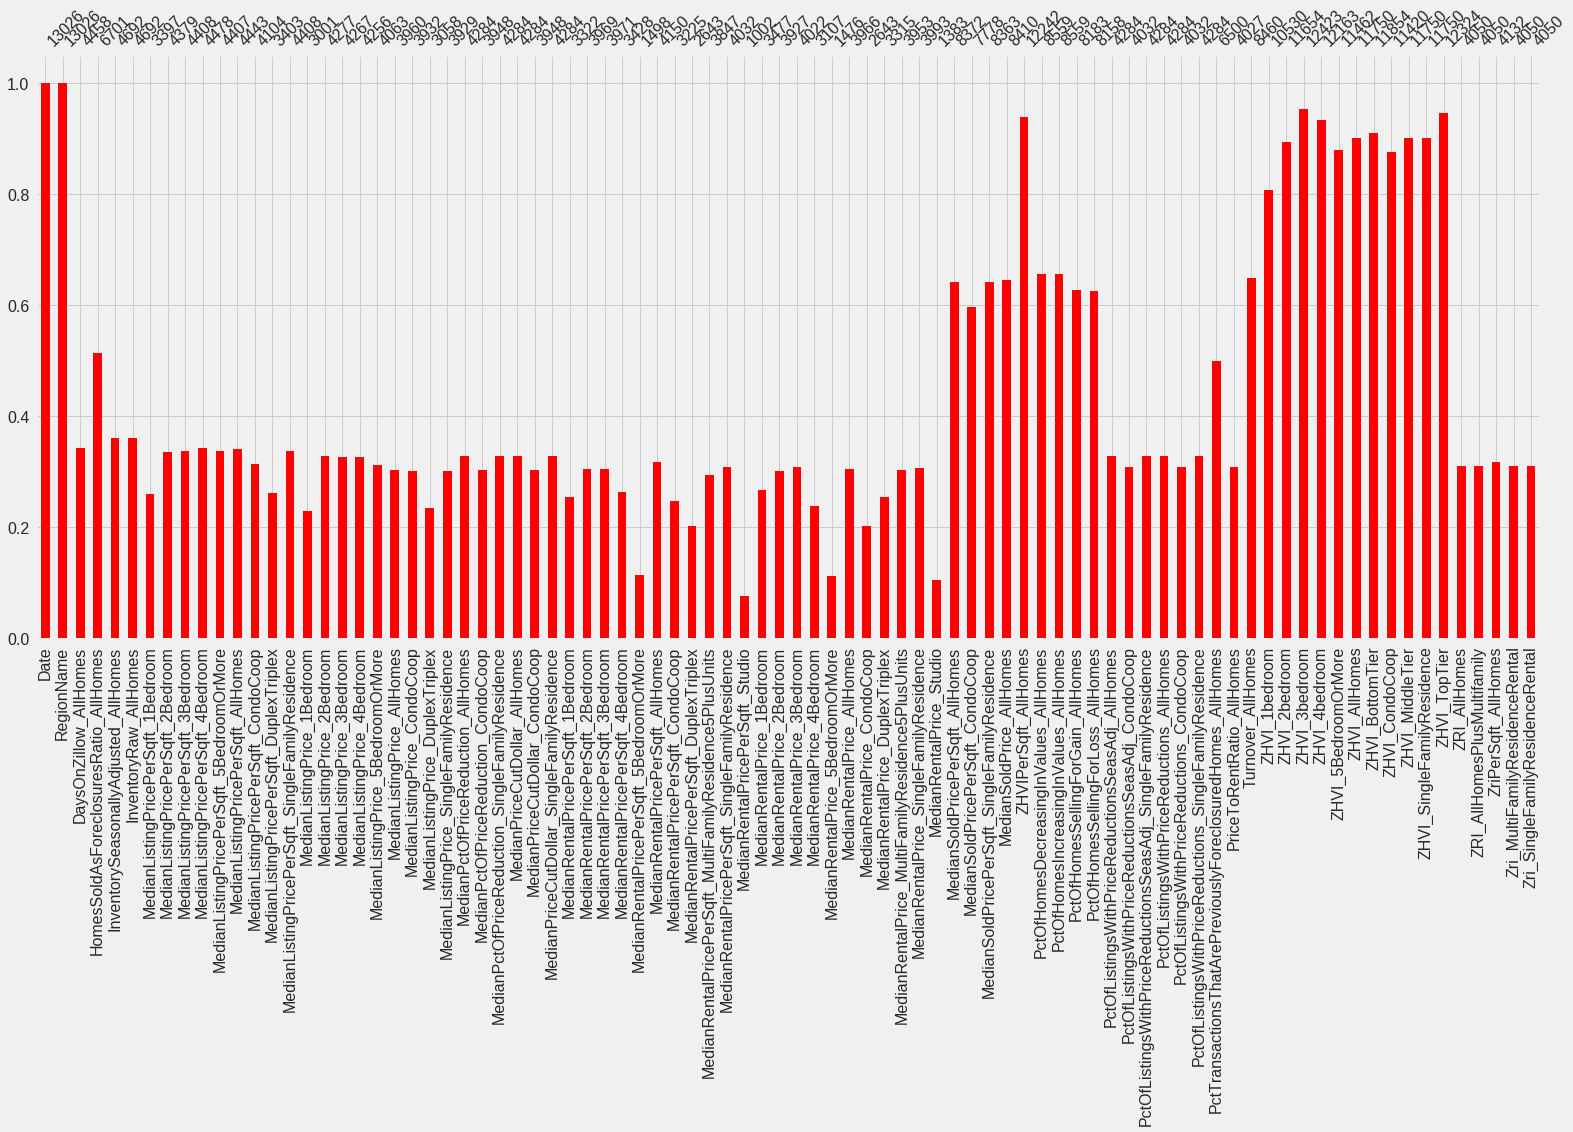

In [6]:
msno.bar(state_ts,color='r')

In [38]:
# percentage of missing value in data  set
missing = state_ts.isnull().sum().sum()
missing * 100/ (state_ts.shape[0]*state_ts.shape[1])

56.58334493803091

# Data analysis
 

In [39]:
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('\n',state_ts['Date'].describe())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00

 count                   13026
unique                    257
top       2012-10-31 00:00:00
freq                       52
first     1996-04-30 00:00:00
last      2017-08-31 00:00:00
Name: Date, dtype: object


The date range is 1996 to 2017, there are 13026 row in the data set. The sample of data availble for total 217 months.
It is better to resample data by month for our analysis
***
# Region Name

In [40]:
cnt = state_ts['RegionName'].value_counts().to_frame()
print('Number of States',state_ts['RegionName'].nunique())
cnt.T

Number of States 52


WestVirginia  Virginia  Hawaii  NewJersey  Utah  Delaware  Nevada  \
RegionName           257       257     257        257   257       257     257   

            Kentucky  NewYork  Tennessee      ...       Georgia  Mississippi  \
RegionName       257      257        257      ...           257          257   

            Louisiana  SouthDakota  DistrictofColumbia  Alaska  Montana  \
RegionName        257          256                 243     240      236   

            Wyoming  NorthDakota  UnitedStates  
RegionName      233          162            91  

[1 rows x 52 columns]

Thier are 52 states in USA, the data avalible in most of states are identical. The NorthDakota,UnitedStates having least data entry.
***

### Days On Zillow AllHomes

"The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December)."

In [7]:
data = [go.Scatter(x=state_ts['Date'],y = state_ts['DaysOnZillow_AllHomes'],line = dict(color = '#17BECF'))]
#layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-08-01']}}
layout = dict(
    title = 'Days On Zillow All Homes',
    
    xaxis=dict(
        range = ['2010-01-01','2017-08-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(range = ['2010-01-01','2017-08-01']),
        type='date'
    )
)
#fig = dict(data,layout)
py.iplot({'data':data,
         'layout': layout})

In [72]:
# Sample data by region name
state_vise = state_ts.groupby(['RegionName']).median()
state_vise.shape

(52, 84)

## Resample

The whole data set is resampled monthly by median. We can also resample data by sum,count etc, but resampling by median will give better result. The sample of data availble for total 217 months.

In [75]:
state_month = state_ts.resample('M',on='Date').median()
state_month = state_month.reset_index()
state_month.shape

(257, 84)

In [11]:
data = [go.Scatter(x=state_month['Date'],y = state_month['DaysOnZillow_AllHomes'])]
#layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
layout = dict(
    title='Days On Zillow All Homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

Let's see median value by state

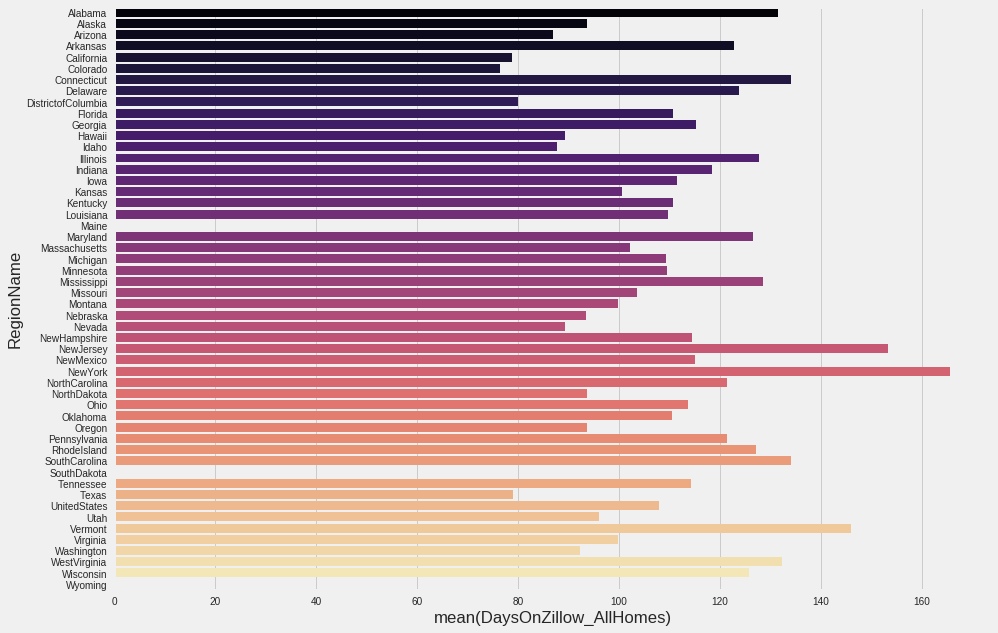

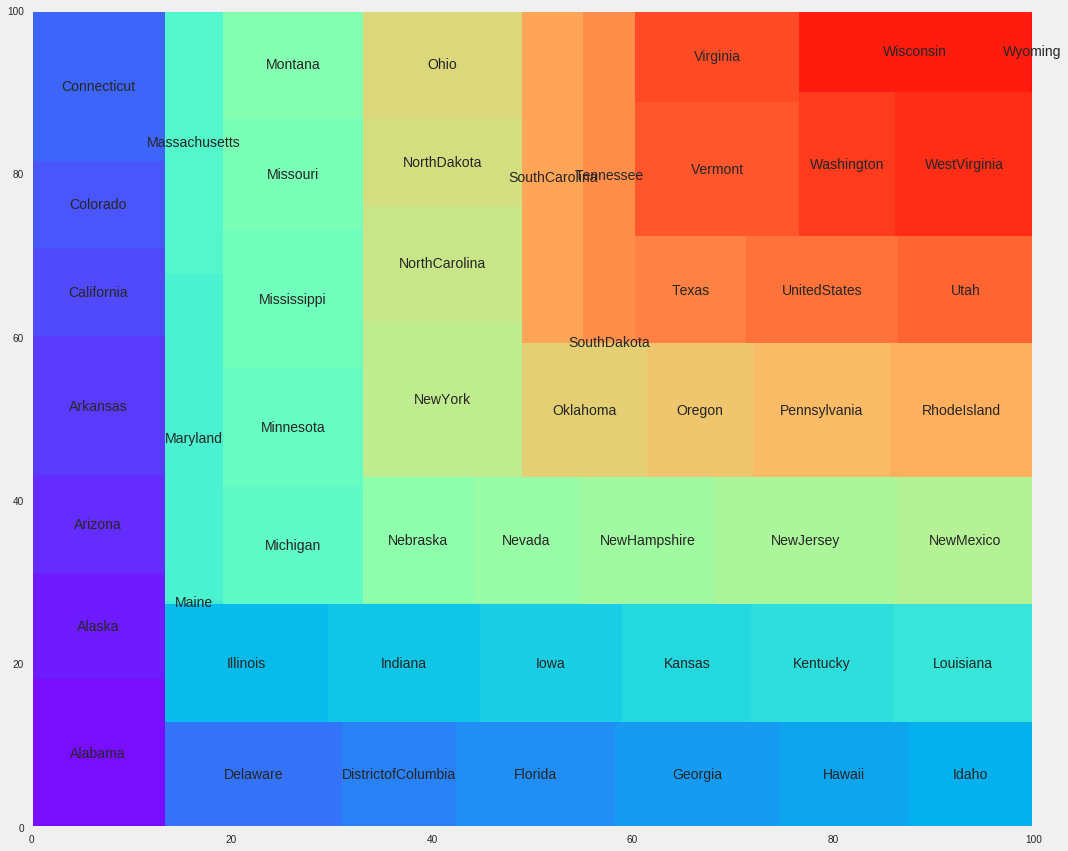

In [45]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['DaysOnZillow_AllHomes'],state_vise.index,palette='magma')

plt.figure(figsize=(16,14))
squarify.plot(sizes=state_vise['DaysOnZillow_AllHomes'].fillna(1),label=state_vise.index,color=sns.color_palette('rainbow',52)
             )
plt.rcParams.update({'font.size':15})

## Inventory
1. InventorySeasonallyAdjusted: A seasonally adjusted measure of the median of weekly snapshot of for-sale homes within a region for a given month,
2. InventoryRaw: Median of weekly snapshot of for-sale homes within a region for a given month

In [12]:
data = [go.Scatter(x = state_month['Date'], y = state_month['InventorySeasonallyAdjusted_AllHomes'],name = 'Seasonally')
       ,go.Scatter(x = state_month['Date'], y = state_month['InventoryRaw_AllHomes'],name = 'Raw')]
#layout = {'title': 'Inventory of All Homes', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}
layout = dict(
    title='Inventory of All Homes',
    
    xaxis=dict(
        range=['2010-01-01','2017-10-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-10-01']),
        type='date'
    )
)
py.iplot({'data':data,'layout': layout})

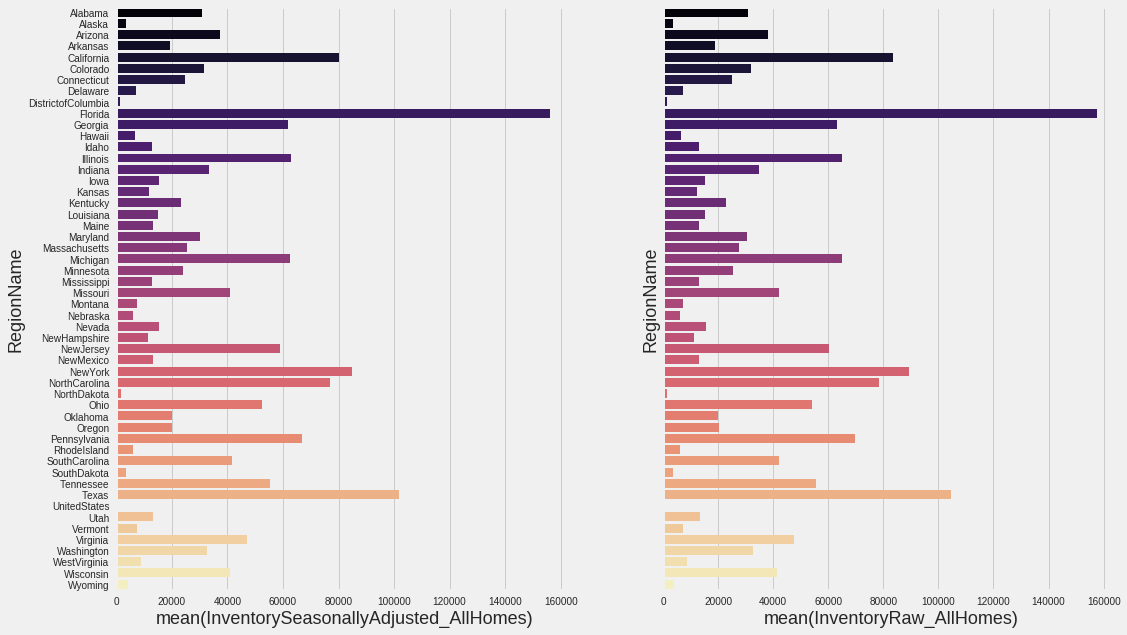

In [47]:
fig,ax = plt.subplots(1,2,figsize=(16,10),sharey='all')
ax1,ax2 = ax.flatten()
sns.barplot(state_vise['InventorySeasonallyAdjusted_AllHomes'],state_vise.index,palette='magma',ax=ax1)
sns.barplot(state_vise['InventoryRaw_AllHomes'],state_vise.index,palette='magma',ax=ax2)

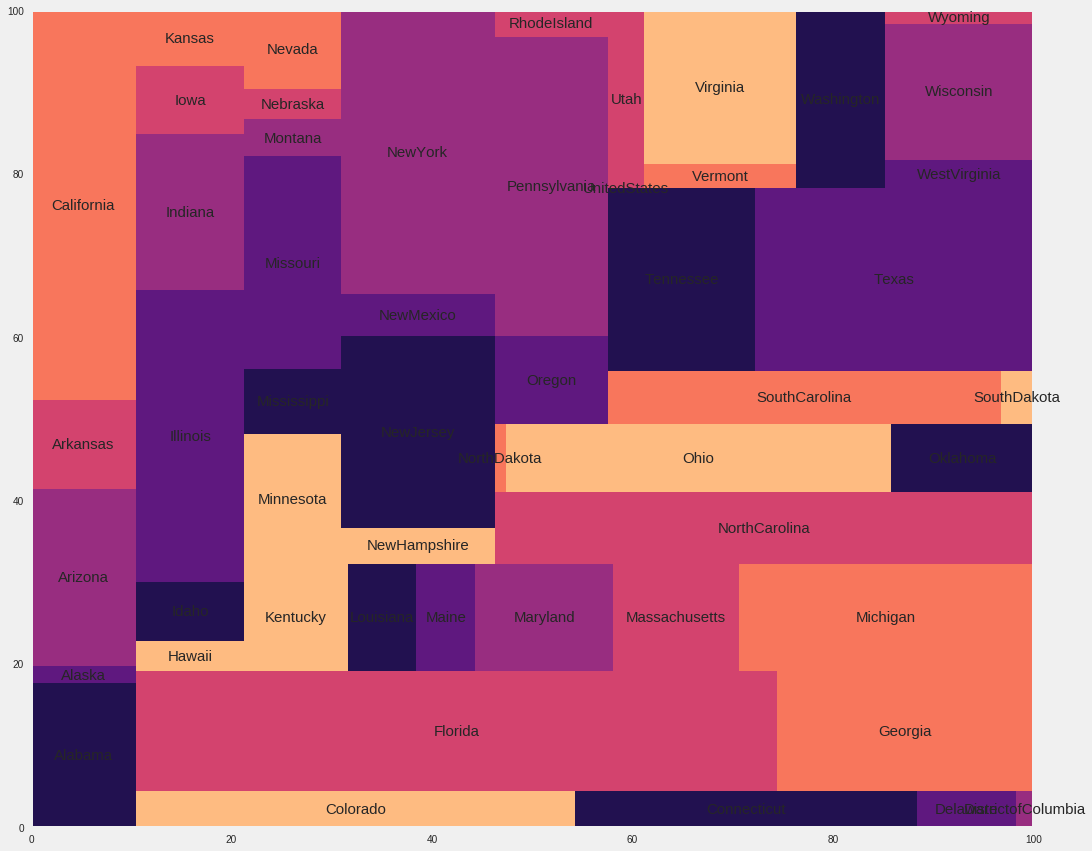

In [48]:
plt.figure(figsize=(16,14))
squarify.plot(sizes = state_vise['InventoryRaw_AllHomes'].fillna(0.1),label=state_vise.index,color=sns.color_palette('magma'))

## Homes SoldAs Foreclosures Ratio
* "The number of homes (per 10,000 homes) that were foreclosed upon in a given month. A foreclosure occurs when a homeowner loses their home to their lending institution or it is sold to a third party at an auction."
The foreclosure of home in the year 2010 is highest

In [13]:
data = [go.Scatter(x = state_month['Date'], y = state_month['HomesSoldAsForeclosuresRatio_AllHomes'],name = 'Sold')]
#layout = {'title': 'Home Sold As Foreclosure Ratio of All Homes', 'font': dict(size=16)}
layout = dict(
    title='Home Sold As Foreclosure Ratio of All Homes',
    font= dict(size=16),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-10-01']),
        type='date'
    )
)
py.iplot({'data':data,'layout': layout})

Let's see median value by state

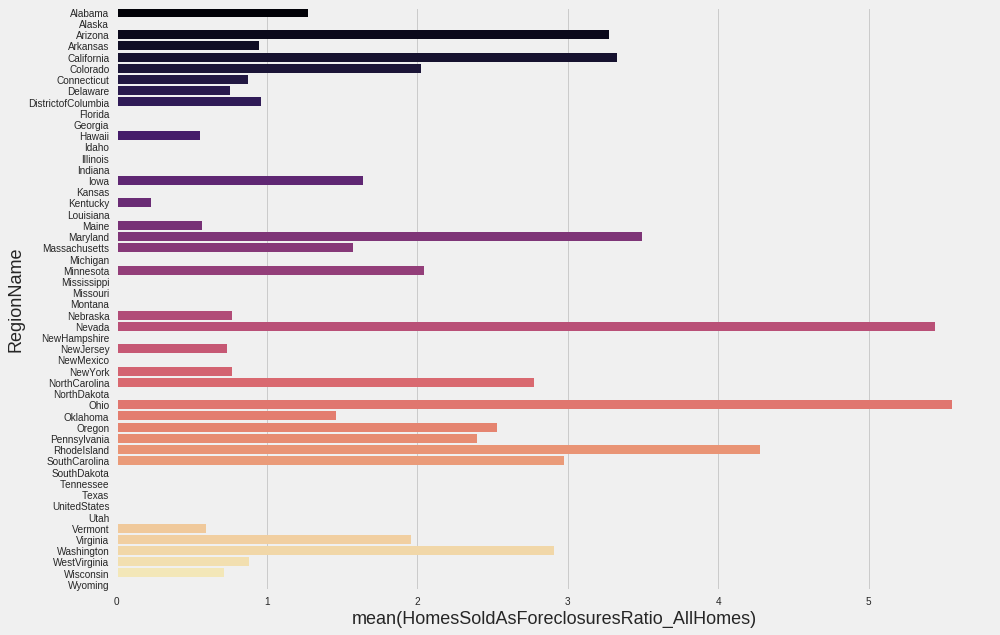

In [50]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['HomesSoldAsForeclosuresRatio_AllHomes'],state_vise.index,palette='magma');

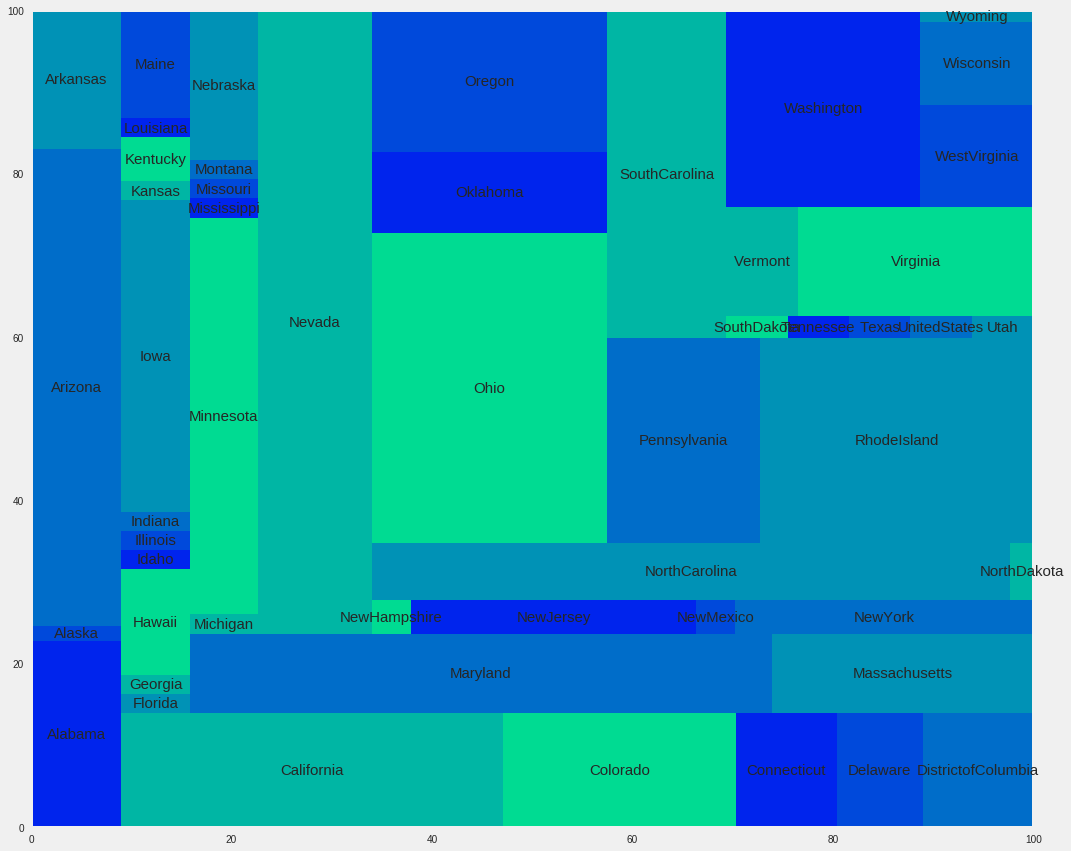

In [51]:
plt.figure(figsize=(16,14))
squarify.plot(sizes=state_vise['HomesSoldAsForeclosuresRatio_AllHomes'].fillna(0.1),label=state_vise.index,
              color=sns.color_palette('winter'))

# Median value of own home per sqaure fit
* MedianListingPricePerSqft: Median of list prices divided by the square footage of a home

In [52]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Listing Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## MedianListingPrice
* Median of the list price (or asking price) for homes listed on Zillow

In [53]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Own House Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Area of house
Area = Median Area of House

In [54]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_1Bedroom']/state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_2Bedroom']/state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_3Bedroom']/state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_4Bedroom']/state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_5BedroomOrMore']/state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_AllHomes']/state_month['MedianListingPricePerSqft_AllHomes'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_DuplexTriplex']/state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_SingleFamilyResidence']/state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Area of House in Sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Percentage Of Price Reduction
* Median of the percentage price reduction for homes with a price reduction during the month
* Reduction in the December of is highest

In [55]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Percentage Reduction', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Price Cut Dollar
* Median of the price reduction for homes with a price reduction during the month

In [56]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Price Cut $', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

# Median value of Rental home per Square foot
* MedianRentalPricePerSqft,Median of the rental price per square foot of homes listed for rent on Zillow in a given region

In [57]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_Studio'], name = 'Studio'),
       ]
       
layout = {'title': 'Median Rental Price/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Rental Price
* Median of the rental price of homes listed for rent on Zillow in a given region

In [58]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_SingleFamilyResidence'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_Studio'], name = 'Studio'),
        
       ]
       
layout = {'title': 'Median Rental Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Sold Price Per Sqft
* Median of sale prices divided by the square footage of a home

In [59]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Sold Price per Sqft', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

## Median Sold Price Of All Home
* Median of the selling price for all homes sold in a given region

In [60]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPrice_AllHomes'], name = 'Sold Price All Home')]
layout = {'title': 'Median Sold Price' }

py.iplot({'data':data,'layout':layout})

## Percentage of Home status
* PctOfHomesDecreasingInValues,The percentage of homes in an given region with values that have decreased in the past year
* PctOfHomesIncreasingInValues,The percentage of homes in an given region with values that have increased in the past year
* PctOfHomesSellingForGain,The percentage of homes in an area that sold for a price higher than the previous sale price
* PctOfHomesSellingForLoss,The percentage of homes in an area that sold for a price lower than the previous sale price

In [61]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesDecreasingInValues_AllHomes'],name = 'Decreasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesIncreasingInValues_AllHomes'], name = 'Increasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForGain_AllHomes'], name = 'Selling Gain'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForLoss_AllHomes'], name = 'Selling Loss'),
       ]
       
layout = {'title': 'Median Sold Price per Sqft', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

In [62]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_AllHomes'], name = 'ALl Home'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_SingleFamilyResidence'], name = 'Single Family'),
       ]
layout = {'title': 'Percentage Listing Price Reduction', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

In [63]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'], name = 'All Home'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'], name = 'Single Family'),
       ]
layout = {'title': 'Percentage Listing Price Reduction Seasonly', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

## Price To Rent Ratio,
"This ratio is first calculated at the individual home level, where the estimated home value is divided by 12 times its estimated monthly rent price. The the median of all home-level price-to-rent ratios for a given region is then calculated."

In [64]:
data = [go.Scatter(x = state_month['Date'],y = state_month['PriceToRentRatio_AllHomes'])]
layout = {'title':'Price/Rent All homes','xaxis':{'range':['2010-01-01','2017-12-01']}}
py.iplot({'data':data,'layout':layout})

In [65]:
data = [go.Scatter(x = state_month['Date'],y = state_month['Turnover_AllHomes'])]
layout = {'title':'Turn over All homes',}
py.iplot({'data':data,'layout':layout})

## ZHVIPerSqft
Median of the value of all homes per square foot. This number is calculated by taking the estimated home value for each home in a given region and dividing it by the home's square footage.

In [66]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZHVIPerSqft_AllHomes'])]
layout = {'title':'ZHVI/Sqft All homes',}
py.iplot({'data':data,'layout':layout})

In [67]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZHVI_1bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_2bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_3bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_4bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_MiddleTier'], name = 'Middle Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_TopTier'], name = 'Top Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_SingleFamilyResidence'], name = 'Single Family'),

       ]
       
layout = {'title': 'Zillow Home median value', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

In [68]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZHVI_1bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_2bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_3bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_4bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_MiddleTier'], name = 'Middle Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_TopTier'], name = 'Top Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_SingleFamilyResidence'], name = 'Single Family'),

       ]
       
layout = {'title': 'Zillow Home median value', 'font': dict(size=16)}

py.iplot({'data':data,'layout': layout})

## ZRI
A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type

In [69]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZRI_AllHomes'], name = 'All Home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZRI_AllHomesPlusMultifamily'], name = 'All Homes +'),
        go.Scatter(x = state_month['Date'], y = state_month['Zri_SingleFamilyResidenceRental'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['Zri_MultiFamilyResidenceRental'], name = 'Multi Family'),       
       ]
layout = {'title': 'ZRI', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

## Zri Per Sqft,
"Median of the estimated monthly rent price of all homes, per square foot. This is calculated by taking the estimated rent price for a home and dividing it by the homes square footage"

In [14]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZriPerSqft_AllHomes'])]
#layout = {'title':'ZHVI/Sqft All homes','xaxis':{'range':['2010-01-01','2017-10-01']}}
layout = dict(
    title='ZHVI/Sqft All homes',
    
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        range=['2010-01-01','2017-10-01'],
        rangeslider=dict(range=['2010-01-01','2017-10-01']),
        type='date'
    )
)
py.iplot({'data':data,'layout':layout})

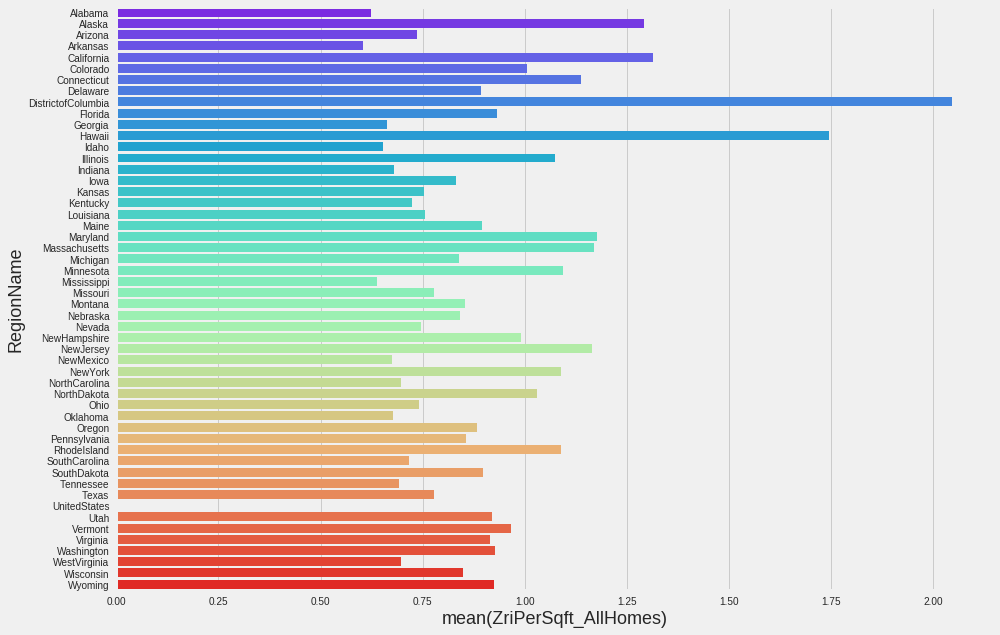

In [74]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['ZriPerSqft_AllHomes'],state_vise.index,palette= 'rainbow')

In [75]:
data = [dict(type='choropleth',
            #colorscale = scl,
             autocolorscale = True,
             locations = state_vise.index,
             z = state_vise['ZriPerSqft_AllHomes'].astype(float),
             locationmode='Country Names',
             text = state_vise.index,
             marker = dict(line = dict(color='rgb(255,255,255)')),
             
            )]

layout = {'title': 'Zri per Sqft',
          'geo':{'scope':'usa','projection':{'type':'albers usa'},'showlakes':True}}
py.iplot({'data':data,'layout':layout})

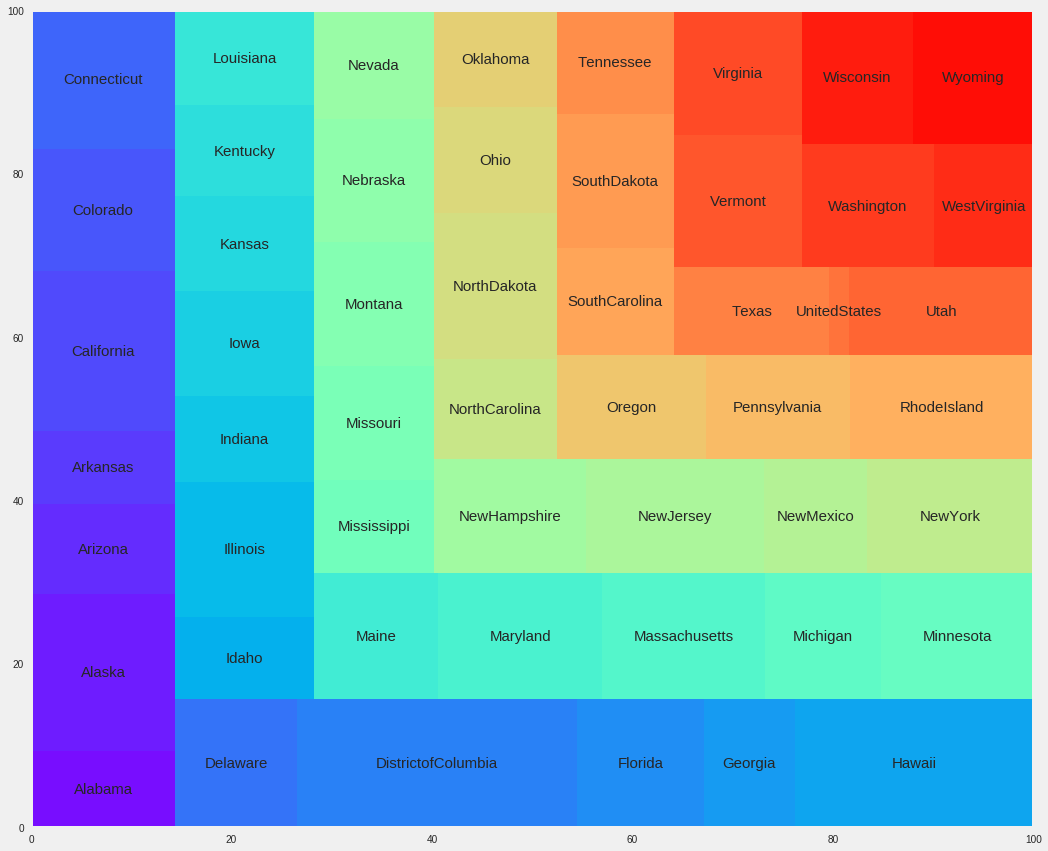

In [76]:
plt.figure(figsize=(16,14))
squarify.plot(sizes=state_vise['ZriPerSqft_AllHomes'].fillna(0.1),label=state_vise.index,
              color=sns.color_palette('rainbow',52))
plt.rcParams.update({'font.size':15})


# Stage 2
***
ARIMA : Auto Regressor Integrated Moving Average


In [16]:
from statsmodels.tsa.stattools import adfuller

***
* Convert date column to type datetime[ns] by using pandas built in fuction
* The data set contains 85 columns, the arima model can handle only one time series data. So will chose one the feature as ts 'MedianSoldPrice_AllHomes'


In [47]:
#state_ts['Date'] = pd.datetime(state_ts['Date'])
#state_ts = state_ts.set_index('Date')
ts = state_ts['MedianSoldPrice_AllHomes']
ts.head()

Date
1996-04-30     86725.0
1996-04-30    102300.0
1996-04-30     68550.0
1996-04-30    155725.0
1996-04-30    127845.0
Name: MedianSoldPrice_AllHomes, dtype: float64

***
### Stationary Time series property 

* Time series data is time dependent, sample are taken on constant time interval. Zillow has taken data on every month end.
* Time series will have some form of seasonality trend.
* If time series is stationary will have statistical property such as mean,variance are remains constant over time.
* The covariance of i the term and i+m term should not be a function of time

[Median Sold Price Of All Home](#Median-Sold-Price-Of-All-Home) plot using plolty is above. 

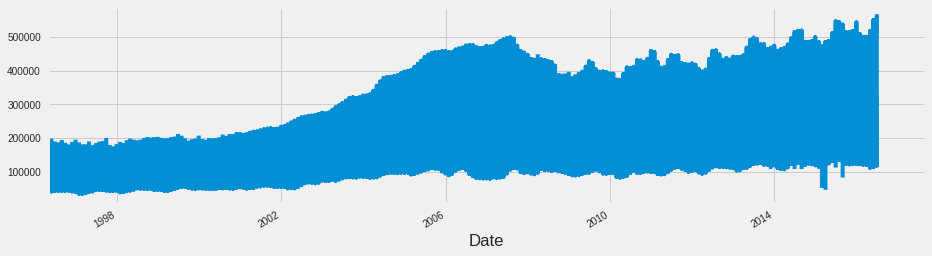

In [50]:
plt.figure(figsize=(14,4))
ts.plot()

### Check stationary
* Plotting rolling statistics: we can plot moving average and moving variance 
* Dickey Fuller test: It is statistical test to check stationarity,
    1. Null Hypothesis H0: Time series is non stationary
    2. Altenate Hypothesis H1: If test statics < critical value reject H0 

In [61]:
# Resample data by monthly
k = ts.resample('M').mean()
k

Date
1996-04-30    104658.735294
1996-05-31    105752.311765
1996-06-30    107144.864706
1996-07-31    108547.239706
1996-08-31    109691.269118
1996-09-30    108339.569118
1996-10-31    106891.758824
1996-11-30    106668.823529
1996-12-31    106578.060294
1997-01-31    106053.152941
1997-02-28    105278.077941
1997-03-31    106266.473529
1997-04-30    108221.691176
1997-05-31    109111.869118
1997-06-30    113502.727143
1997-07-31    114654.462606
1997-08-31    115248.047143
1997-09-30    114738.512857
1997-10-31    114090.090000
1997-11-30    114060.492857
1997-12-31    114702.974286
1998-01-31    113765.874286
1998-02-28    112705.421429
1998-03-31    113881.888571
1998-04-30    115959.915714
1998-05-31    117918.982857
1998-06-30    120742.042857
1998-07-31    122680.564286
1998-08-31    123061.307143
1998-09-30    122512.535714
                  ...      
2015-03-31    207034.063277
2015-04-30    216182.792647
2015-05-31    222430.410294
2015-06-30    226200.574066
2015-07-31    2

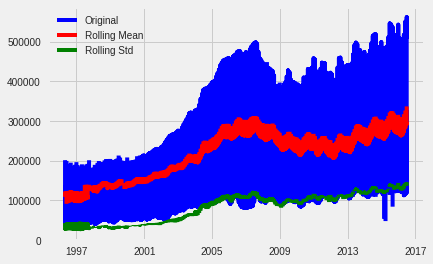

In [54]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = ts.rolling(window = ).mean()
    rol_std = ts.rolling(window = 8).std()
    
    #plot rolling statistics
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
test_stationarity(ts)

## Thank you